<a href="https://colab.research.google.com/github/SudiptoChowdhury25/Simulation-and-Modeling-Lab/blob/main/Lab_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Sudipta Roy Chowdhury**

ID: **2215151025**

Section: **7A1**

Course: **Simulation & Modeling LAB**

**ASSIGNMENT:**

### Situation 2 (Note: This is a Monte Carlo simulation problem.)

LatinOrg Inc. sells an organic product made in Costa Rica. Because of the time it takes to receive and order the products, LatinOrg places an order every two weeks. The number of products ordered is the difference between the actual on-hand inventory at the end of the week in which the order is made and 100, the maximum allowed amount.

It costs $50

to place and receive an order,
$4

for each product, and $1

per week to keep the product in the store. The product sells for $12. The historical information on on-hand inventory at the time an order is made is shown below.

| On-hand inventory | Probability |
|-------------------|-------------|
| 15                | 0.12        |
| 25                | 0.25        |
| 35                | 0.35        |
| 40                | 0.20        |
| 42                | 0.06        |
| 55                | 0.02        |

**a)** Simulating 60 weeks, what is the estimated average order size (show your data or calculations)?  
**b)** Based on the simulation, what is the average total cost of “having” the product?

---

### Single Server Queueing:

1. Perform a simulation for 200 customers with λ = 3 and μ = 4. Calculate and compare the waiting time and server utilization.  
2. Simulate a system with λ = 8 and μ = 6. Discuss the impact of server overload on system performance.  
3. Modify the program to include a limited queue capacity (e.g., maximum 10 customers). Analyze how this affects the performance metrics.


## Problem 1: Monte Carlo Simulation - Inventory Management

---



---



---

In [3]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Historical inventory data and probabilities
inventory_levels = np.array([15, 25, 35, 40, 42, 55])
probabilities = np.array([0.12, 0.25, 0.35, 0.20, 0.06, 0.02])

# Simulation parameters
weeks = 60
order_every = 2
orders = weeks // order_every

# Simulate on-hand inventory
simulated_inventory = np.random.choice(inventory_levels, size=orders, p=probabilities)

# Calculate order size (max = 100)
order_sizes = 100 - simulated_inventory
avg_order_size = np.mean(order_sizes)
print("Problem 1(a):")
print(f"Simulated On-hand Inventories (every 2 weeks):\n{simulated_inventory}")
print(f"Order Sizes: {order_sizes}")
print(f"Estimated Average Order Size over {weeks} weeks: {avg_order_size:.2f}")

Problem 1(a):
Simulated On-hand Inventories (every 2 weeks):
[35 42 40 35 25 25 15 40 35 35 15 42 40 25 25 25 25 35 35 25 35 25 25 25
 35 40 25 35 35 15]
Order Sizes: [65 58 60 65 75 75 85 60 65 65 85 58 60 75 75 75 75 65 65 75 65 75 75 75
 65 60 75 65 65 85]
Estimated Average Order Size over 60 weeks: 69.53


In [4]:
# Cost Parameters
order_cost = 50
unit_cost = 4
holding_cost_per_week = 1

# Calculate total cost over the simulation
total_costs = []
for inventory, order_size in zip(simulated_inventory, order_sizes):
    product_cost = order_size * unit_cost
    holding_cost = inventory * holding_cost_per_week * order_every
    total_cost = order_cost + product_cost + holding_cost
    total_costs.append(total_cost)

average_total_cost = np.mean(total_costs)
print("Problem 1(b):")
print(f"Average Total Cost of 'Having' the Product over {orders} orders: ${average_total_cost:.2f}")

Problem 1(b):
Average Total Cost of 'Having' the Product over 30 orders: $389.07


## Problem 2: Single Server Queueing Simulation

Problem 1:
Server Utilization: 79.73%
Average Waiting Time: 0.59 units
Average Queue Length: 0.81 customers


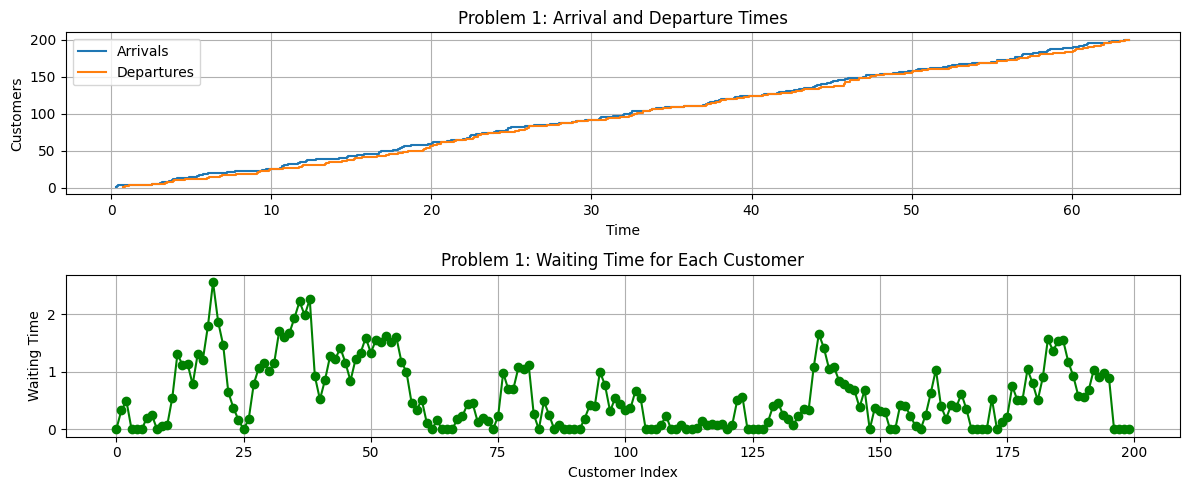

In [5]:
# Perform a simulation for 200 customers with λ = 3 and μ = 4. Calculate and compare the waiting time and server utilization.
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 3
mu_rate = 4
n_customers = 200

# Generate times
inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

waiting_times = start_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

print("Problem 1:")
print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")

# Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 1: Arrival and Departure Times')

plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'go-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 1: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()


Problem 2:
Server Utilization: 93.06%
Average Waiting Time: 1.66 units
Average Queue Length: 0.93 customers


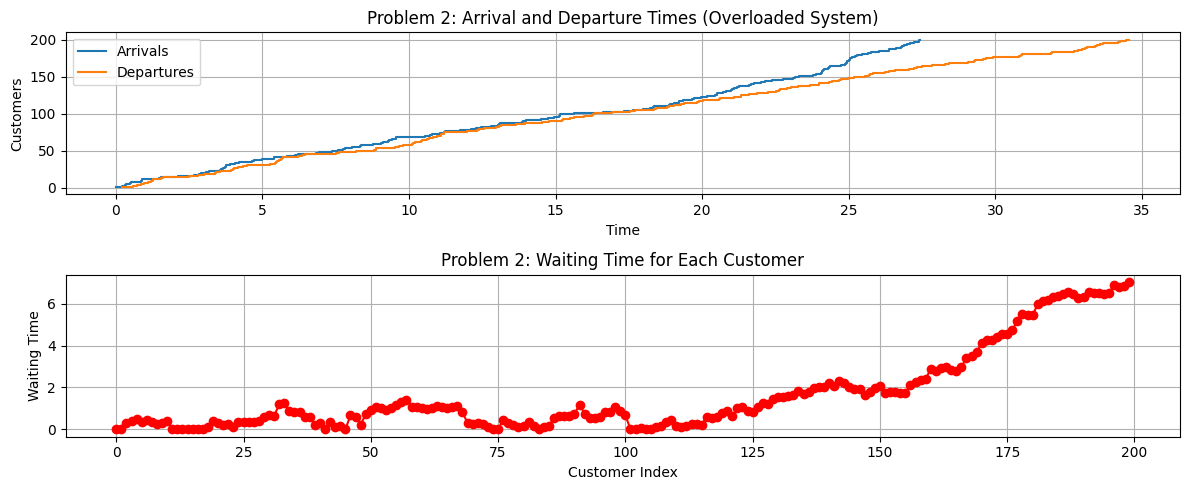

In [6]:
# Simulate a system with λ = 8 and μ = 6. Discuss the impact of server overload on system performance.
# Parameters
lambda_rate = 8
mu_rate = 6
n_customers = 200

inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

waiting_times = start_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

print("Problem 2:")
print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")

# Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 2: Arrival and Departure Times (Overloaded System)')

plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'ro-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 2: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()


Problem 3 (Limited Queue Capacity = 10):
Total Customers: 200
Accepted Customers: 188
Rejected Customers: 12
Server Utilization: 83.77%
Average Waiting Time: 3.68 units
Average Queue Length: 0.94 customers


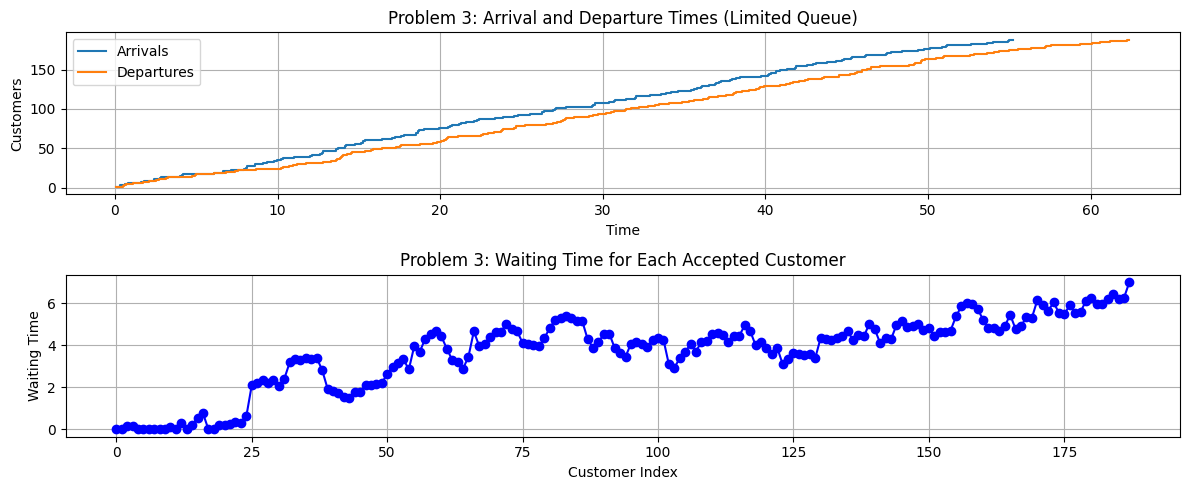

In [7]:
# Modify the program to include a limited queue capacity (e.g., maximum 10 customers). Analyze how this affects the performance metrics.
# Parameters
lambda_rate = 3
mu_rate = 4
n_customers = 200
queue_capacity = 10

inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = []
end_times = []
queue = []
rejected_customers = 0
server_available_time = 0

for i in range(n_customers):
    arrival = arrival_times[i]
    service = service_times[i]

    queue = [end for end in queue if end > arrival]

    if len(queue) < queue_capacity:
        start_time = max(arrival, server_available_time)
        end_time = start_time + service
        server_available_time = end_time
        queue.append(end_time)
        start_times.append(start_time)
        end_times.append(end_time)
    else:
        rejected_customers += 1

waiting_times = np.array(start_times) - arrival_times[:len(start_times)]
server_utilization = np.sum(service_times[:len(end_times)]) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

print("Problem 3 (Limited Queue Capacity = 10):")
print(f"Total Customers: {n_customers}")
print(f"Accepted Customers: {len(end_times)}")
print(f"Rejected Customers: {rejected_customers}")
print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")

# Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times[:len(end_times)], np.arange(1, len(end_times)+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, len(end_times)+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 3: Arrival and Departure Times (Limited Queue)')

plt.subplot(2,1,2)
plt.plot(range(len(end_times)), waiting_times, 'bo-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 3: Waiting Time for Each Accepted Customer')
plt.tight_layout()
plt.show()